In [8]:
import cv2, random, os, glob, math, pathlib, csv, PIL
import zipfile

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import pydicom

from os import listdir
from PIL import Image
from tqdm import tqdm 

import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.models as models

from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import ImageFolder

In [9]:
basepath = %pwd
print(os.listdir(basepath + '/'))

['Dataset_BUSI_with_GT', 'masks', 'New_LungUS', 'patient list.xlsx', 'read_me.txt', 'data', '.ipynb_checkpoints', 'dcm_info.csv', 'LungUS_csv_dicom.csv', 'dcm_inf.csv', '00_snuh_model.ipynb']


In [10]:
inputdir = basepath + '/data'
inputdir

'/home/Sean/Project/iRail_US/Data/data'

In [11]:
Captital_img  =  glob.glob(inputdir+os.sep+"/*/*.DCM")
lower_img  =  glob.glob(inputdir+os.sep+"/*/*.dcm")
image_dir = list(set(Captital_img) - set(lower_img))

print('Total number of Data: ', len(image_dir))

Total number of Data:  5062


Type of the random image: <class 'pydicom.dataset.FileDataset'> 
Shape of the random image: '(768, 1024), 
Path : /home/Sean/Project/iRail_US/Data/data/167_2/167_2_0014.DCM


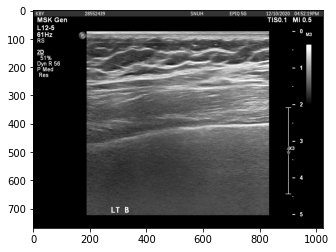

In [12]:
rand_path = random.choice(image_dir)
rand_img = pydicom.dcmread(rand_path)
plt.imshow(rand_img.pixel_array, cmap=plt.cm.gray)

print( f"Type of the random image: {type(rand_img)} \nShape of the random image: '{rand_img.pixel_array.shape}, \nPath : {rand_path}")

In [13]:
df = pd.read_csv('/home/Sean/Project/iRail_US/Data/dcm_inf.csv')
df.head()

,FolderID,ID,Filename,hospital ID,case based,Location,im,Observation,profile,age,sex,InstanceCreationDate,InstanceCreationTime,SOPClassUID,SOPInstanceUID,ImageType,StudyDate,SeriesDate,ContentDate
0,002/002_0005.DCM,2,./data/002/002_0005.DCM,53625528,normal,RT1,5,A,A profile,65,2,20200326.0,135830.0,1.2.840.10008.5.1.4.1.1.6.1,1.2.840.113663.1500.1.388240979.3.6.20200326.1...,"['ORIGINAL', 'PRIMARY', 'OBSTETRICAL']",20200326,20200326,20200326
1,002/002_0007.DCM,2,./data/002/002_0007.DCM,53625528,normal,RT2,7,A,A profile,65,2,20200326.0,135850.0,1.2.840.10008.5.1.4.1.1.6.1,1.2.840.113663.1500.1.388240979.3.8.20200326.1...,"['ORIGINAL', 'PRIMARY', 'OBSTETRICAL']",20200326,20200326,20200326
2,002/002_0009.DCM,2,./data/002/002_0010.DCM,53625528,normal,LT1,10,A,A profile,65,2,20200326.0,140026.0,1.2.840.10008.5.1.4.1.1.6.1,1.2.840.113663.1500.1.388240979.3.11.20200326....,"['ORIGINAL', 'PRIMARY', 'OBSTETRICAL']",20200326,20200326,20200326
3,002/002_0010.DCM,2,./data/002/002_0013.DCM,53625528,normal,LT3,13,Effusion,A profile,65,2,20200326.0,140228.0,1.2.840.10008.5.1.4.1.1.6.1,1.2.840.113663.1500.1.388240979.3.14.20200326....,"['ORIGINAL', 'PRIMARY', 'OBSTETRICAL']",20200326,20200326,20200326
4,002/002_0012.DCM,2,./data/002/002_0012.DCM,53625528,normal,LT2,12,A,A profile,65,2,20200326.0,140209.0,1.2.840.10008.5.1.4.1.1.6.1,1.2.840.113663.1500.1.388240979.3.13.20200326....,"['ORIGINAL', 'PRIMARY', 'OBSTETRICAL']",20200326,20200326,20200326


Observation
A                1283
B                 368
Effusion           66
Others             56
Consolidation      41
dtype: int64

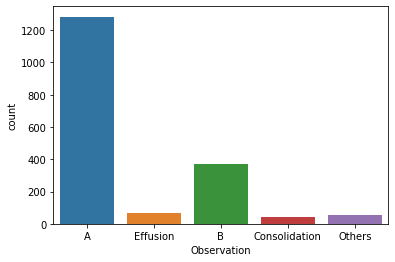

In [14]:
sns.countplot(x = 'Observation', data=df)
df.value_counts('Observation')

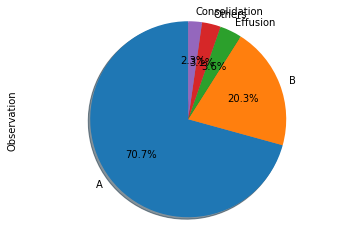

In [15]:
fig1, ax1 = plt.subplots()
df.iloc[:,7].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90,ax=ax1)
ax1.axis("equal")
plt.show()

In [ ]:
'FolderID', 'ID', 'Filename','hospital ID','case based','Location','im','Observation'

In [16]:
df_new = df[['Filename', 'Observation']]
df_new

,Filename,Observation
0,./data/002/002_0005.DCM,A
1,./data/002/002_0007.DCM,A
2,./data/002/002_0010.DCM,A
3,./data/002/002_0013.DCM,Effusion
4,./data/002/002_0012.DCM,A
...,...,...
1809,./data/188/188_0018.DCM,A
1810,./data/188/188_0015.DCM,Effusion
1811,./data/188/188_0019.DCM,B
1812,./data/188/188_0009.DCM,B


In [111]:
df = pd.read_csv('/home/Sean/Project/iRail_US/Data/dcm_inf2.csv')
df.head()

,FolderID,ID,Filename,dcms,Location,im,Observation,profile,age,sex,InstanceCreationDate,InstanceCreationTime,SOPClassUID,SOPInstanceUID,ImageType,StudyDate,SeriesDate,ContentDate
0,002/002_0005.DCM,2,/data/002/002_0005,DCM,RT1,5,A,A profile,65,2,20200326.0,135830.0,1.2.840.10008.5.1.4.1.1.6.1,1.2.840.113663.1500.1.388240979.3.6.20200326.1...,"['ORIGINAL', 'PRIMARY', 'OBSTETRICAL']",20200326,20200326,20200326
1,002/002_0007.DCM,2,/data/002/002_0007,DCM,RT2,7,A,A profile,65,2,20200326.0,135850.0,1.2.840.10008.5.1.4.1.1.6.1,1.2.840.113663.1500.1.388240979.3.8.20200326.1...,"['ORIGINAL', 'PRIMARY', 'OBSTETRICAL']",20200326,20200326,20200326
2,002/002_0009.DCM,2,/data/002/002_0010,DCM,LT1,10,A,A profile,65,2,20200326.0,140026.0,1.2.840.10008.5.1.4.1.1.6.1,1.2.840.113663.1500.1.388240979.3.11.20200326....,"['ORIGINAL', 'PRIMARY', 'OBSTETRICAL']",20200326,20200326,20200326
3,002/002_0010.DCM,2,/data/002/002_0013,DCM,LT3,13,Effusion,A profile,65,2,20200326.0,140228.0,1.2.840.10008.5.1.4.1.1.6.1,1.2.840.113663.1500.1.388240979.3.14.20200326....,"['ORIGINAL', 'PRIMARY', 'OBSTETRICAL']",20200326,20200326,20200326
4,002/002_0012.DCM,2,/data/002/002_0012,DCM,LT2,12,A,A profile,65,2,20200326.0,140209.0,1.2.840.10008.5.1.4.1.1.6.1,1.2.840.113663.1500.1.388240979.3.13.20200326....,"['ORIGINAL', 'PRIMARY', 'OBSTETRICAL']",20200326,20200326,20200326


In [113]:
df = df[['Filename', 'Observation']]
df

,Filename,Observation
0,/data/002/002_0005,A
1,/data/002/002_0007,A
2,/data/002/002_0010,A
3,/data/002/002_0013,Effusion
4,/data/002/002_0012,A
...,...,...
1809,/data/188/188_0018,A
1810,/data/188/188_0015,Effusion
1811,/data/188/188_0019,B
1812,/data/188/188_0009,B


In [ ]:
df['image_path'] = train.image_id + ('.png')
df.head()

## model

In [24]:
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
) 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"'{device}' is avilable.")

'cuda' is avilable.


In [25]:
img_path = "/home/Sean/Project/iRail_US/Data/data/"


In [92]:
from skimage import io

class USDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = pydicom.dcmread(img_path) #io.imread 였음 rand_img.pixel_array
        y_label = torch.tensor(self.annotations.iloc[index, 1:].astype(int))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)
    

In [93]:
transformations = transforms.Compose([ transforms.Resize((224, 224)), 
                                      transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [94]:
dataset = USDataset(
    csv_file="/home/Sean/Project/iRail_US/Data/dcm_inf.csv",
    root_dir="/home/Sean/Project/iRail_US/Data/data/",
    transform=transformations,
)

In [95]:
train_img= df_new['Filename'].iloc[:]
train_img

0       ./data/002/002_0005.DCM
1       ./data/002/002_0007.DCM
2       ./data/002/002_0010.DCM
3       ./data/002/002_0013.DCM
4       ./data/002/002_0012.DCM
                 ...           
1809    ./data/188/188_0018.DCM
1810    ./data/188/188_0015.DCM
1811    ./data/188/188_0019.DCM
1812    ./data/188/188_0009.DCM
1813    ./data/188/188_0024.DCM
Name: Filename, Length: 1814, dtype: object

In [96]:
n_train = (round(len(train_img)*0.8))
n_val = round(len(train_img)*0.1)
n_test = round(len(train_img)*0.1)
print(f"Total Number of the images : {len(train_img)} \nThe proportion of the [8:1:1] : {round(len(train_img)*0.8)}, {round(len(train_img)*0.1)}, {round(len(train_img)*0.1)}")

Total Number of the images : 1814 
The proportion of the [8:1:1] : 1451, 181, 181


In [97]:
train_ds, val_ds, test_ds = torch.utils.data.random_split(dataset, [n_train+1, n_val, n_test])
random_seed = 0
torch.manual_seed(random_seed)
batch_size = 32

train_loader = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True) 
val_loader = DataLoader(val_ds, batch_size*2, num_workers = 4, pin_memory = True) 
test_loader = DataLoader(test_ds, batch_size*2, num_workers = 4, pin_memory = True) 

print(f'Train : {len(train_ds)}, Validation : {len(val_ds)}, Test : {len(test_ds)}')

Train : 1452, Validation : 181, Test : 181


In [98]:
dataloader = {"train":DataLoader(train_ds , shuffle=True , batch_size=batch_size),
              "val": DataLoader(val_ds , shuffle=True , batch_size=batch_size),
              "test": DataLoader(test_ds , shuffle=True , batch_size=batch_size) }

## Modeul developing

In [99]:
classLabels = ['A', 'B', 'Effusion', 'Others', 'Consolidation']

In [100]:
model = torchvision.models.resnet50(pretrained=True)

In [101]:
num_features = model.fc.in_features # get the no of on_features in last Linear unit
print(num_features)
## freeze the entire convolution base
for param in model.parameters():
    param.requires_grad_(False)
    
def create_head(num_features , number_classes ,dropout_prob=0.5 ,activation_func =nn.ReLU):
    features_lst = [num_features , num_features//2 , num_features//4]
    layers = []
    for in_f ,out_f in zip(features_lst[:-1] , features_lst[1:]):
        layers.append(nn.Linear(in_f , out_f))
        layers.append(activation_func())
        layers.append(nn.BatchNorm1d(out_f))
        if dropout_prob !=0 : layers.append(nn.Dropout(dropout_prob))
    layers.append(nn.Linear(features_lst[-1] , number_classes))
    return nn.Sequential(*layers)

top_head = create_head(num_features , len(classLabels)) # because ten classes
model.fc = top_head # replace the fully connected layer

2048


In [102]:
# Hyperparameters
in_channel = 3
num_classes = 5
learning_rate = 1e-5
batch_size = 64
num_epochs = 10

In [103]:
import torch.optim as optim
model.to(device)
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [104]:
from tqdm import trange
from sklearn.metrics import precision_score,f1_score

def train(model , data_loader , criterion , optimizer , num_epochs=5):
    for epoch in trange(num_epochs,desc="Epochs"):
        result = []
        for phase in ['train', 'val']:
            if phase=="train":     # put the model in training mode
                model.train()
                #scheduler.step()
            else:     # put the model in validation mode
                model.eval()
       
            # keep track of training and validation loss
            running_loss = 0.0
            running_corrects = 0.0  
            
            for data , target in data_loader[phase]:
                #load the data and target to respective device
                data , target = data.to(device)  , target.to(device)
                
                with torch.set_grad_enabled(phase=="train"):
                    #feed the input
                    output = model(data)
                    #calculate the loss
                    loss = criterion(output,target.float())
                    preds = torch.sigmoid(output).data > 0.5
                    preds = preds.to(torch.float32)
                    
                    if phase=="train"  :
                        # backward pass: compute gradient of the loss with respect to model parameters 
                        loss.backward()
                        # update the model parameters
                        optimizer.step()
                        # zero the grad to stop it from accumulating
                        optimizer.zero_grad()
                        
                # statistics
                running_loss += loss.item() * data.size(0)
                running_corrects += f1_score(target.to("cpu").to(torch.int).numpy() ,preds.to("cpu").to(torch.int).numpy() , average="samples")  * data.size(0)
                
            epoch_loss = running_loss / len(data_loader[phase].dataset)
            epoch_acc = running_corrects / len(data_loader[phase].dataset)
            
            result.append('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
        print(result)

In [105]:
train(model,dataloader , criterion, optimizer, num_epochs=num_epochs)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


ValueError: invalid literal for int() with base 10: './data/173/173_0015.DCM'